<a href="https://colab.research.google.com/github/laraharantes/Challenged-TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados_brutos = pd.read_json('/content/TelecomX_Data.json')
dados_brutos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

**Verificar o dataset e os tipos de dados**

In [3]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


**Verificar tipos de dados inconsistentes**

In [4]:
dados_brutos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


**Normalizando os dados**

In [5]:

customer = dados_brutos['customer'].apply(pd.Series)
phone = dados_brutos['phone'].apply(pd.Series)
internet = dados_brutos['internet'].apply(pd.Series)
account = dados_brutos['account'].apply(pd.Series)
charges = account['Charges'].apply(pd.Series)

# 3. Concatena tudo em um único DataFrame
dados = pd.concat([
    dados_brutos[['customerID', 'Churn']],
    customer, phone, internet, account.drop(columns='Charges'), charges
], axis=1)

# 4. Padroniza nomes das colunas para minúsculo
dados.columns = [col.lower() for col in dados.columns]

# 5. Corrige e converte a coluna 'churn'
dados['churn'] = dados['churn'].astype(str).str.strip().str.lower()
dados = dados[dados['churn'].isin(['yes', 'no'])]
dados['churn'] = dados['churn'].map({'yes': 1, 'no': 0})

# 6. Verifica o resultado
print("Valores únicos em 'churn':", dados['churn'].unique())
print("Quantidade de linhas:", dados.shape[0])



Valores únicos em 'churn': [0 1]
Quantidade de linhas: 7043


In [6]:
# Corrigir nomes de colunas com espaços, pontos e letras maiúsculas

dados.columns = dados.columns.str.replace('.', '_')
dados.columns = dados.columns.str.replace(' ', '_')
dados.columns = dados.columns.str.lower()
dados.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthly,total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Tratando a coluna 'Charges Total'**

In [7]:
# 1. Extrai a coluna Charges de forma robusta
charges = account['Charges'].apply(pd.Series)

# 2. Adiciona ao DataFrame principal
dados['charges_monthly'] = pd.to_numeric(charges['Monthly'], errors='coerce')
dados['charges_total'] = pd.to_numeric(charges['Total'], errors='coerce')

# 3. Verifica o resultado
print("Valores únicos em 'charges_monthly':", dados['charges_monthly'].unique())
print("Valores únicos em 'charges_total':", dados['charges_total'].unique())


Valores únicos em 'charges_monthly': [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Valores únicos em 'charges_total': [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [8]:
dados['charges_total'] = dados['charges_total'].fillna(dados['charges_total'].median())
dados['charges_monthly'] = dados['charges_monthly'].fillna(dados['charges_monthly'].median())
print("Valores nulos em 'charges_total':", dados['charges_total'].isnull().sum())
print("Valores nulos em 'charges_monthly':", dados['charges_monthly'].isnull().sum())

Valores nulos em 'charges_total': 0
Valores nulos em 'charges_monthly': 0


**Verificar dados duplicados**

In [9]:
dados.duplicated().sum()

np.int64(0)

**Verificar colunas categóricas**

In [10]:
colunas_categoricas = [
    'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies',
    'contract', 'paperlessbilling', 'paymentmethod', 'churn'
]


for coluna in colunas_categoricas:
    print(f"\n{coluna}:\n{dados[coluna].value_counts(dropna=False)}")


gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

seniorcitizen:
seniorcitizen
0    5901
1    1142
Name: count, dtype: int64

partner:
partner
No     3641
Yes    3402
Name: count, dtype: int64

dependents:
dependents
No     4933
Yes    2110
Name: count, dtype: int64

phoneservice:
phoneservice
Yes    6361
No      682
Name: count, dtype: int64

multiplelines:
multiplelines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

internetservice:
internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

onlinesecurity:
onlinesecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

onlinebackup:
onlinebackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

deviceprotection:
deviceprotection
No                     3095
Yes                    2422
No intern

In [11]:
print(dados.shape)
print(dados.columns.tolist())


(7043, 23)
['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthly', 'total', 'charges_monthly', 'charges_total']


**Padronizando a formatação os dados**

In [12]:
colunas_tratadas = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                    'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines']

for col in colunas_tratadas:
    if col in dados.columns:
        print(f"\nValores únicos originais da coluna {col}:")
        print(dados[col].unique())


Valores únicos originais da coluna onlinesecurity:
['No' 'Yes' 'No internet service']

Valores únicos originais da coluna onlinebackup:
['Yes' 'No' 'No internet service']

Valores únicos originais da coluna deviceprotection:
['No' 'Yes' 'No internet service']

Valores únicos originais da coluna techsupport:
['Yes' 'No' 'No internet service']

Valores únicos originais da coluna streamingtv:
['Yes' 'No' 'No internet service']

Valores únicos originais da coluna streamingmovies:
['No' 'Yes' 'No internet service']

Valores únicos originais da coluna multiplelines:
['No' 'Yes' 'No phone service']


In [13]:
colunas_tratadas = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                    'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines']

# Padronizar todos os valores: string, minúsculo, sem espaços
for col in colunas_tratadas:
    if col in dados.columns:
        dados[col] = dados[col].astype(str).str.lower().str.strip()

# Substituir todos os 'no internet service' e 'no phone service' por 'no'
for col in colunas_tratadas:
    if col in dados.columns:
        dados[col] = dados[col].replace({
            'no internet service': 'no',
            'no phone service': 'no'
        })

# Mapear yes → 1, no → 0
binario = {'yes': 1, 'no': 0}
for col in colunas_tratadas:
    if col in dados.columns:
        dados[col] = dados[col].map(binario)


In [14]:
for col in colunas_tratadas:
    print(f"{col}: {dados[col].unique()}")



onlinesecurity: [0 1]
onlinebackup: [1 0]
deviceprotection: [0 1]
techsupport: [1 0]
streamingtv: [1 0]
streamingmovies: [0 1]
multiplelines: [0 1]


In [15]:
print(dados.columns)


Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthly', 'total',
       'charges_monthly', 'charges_total'],
      dtype='object')


In [16]:
dados[colunas_tratadas].dtypes
dados[colunas_tratadas].head()


,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,0,1,0,1,1,0,0
1,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0
3,0,1,1,0,1,1,0
4,0,0,0,1,1,0,0


**Verficar valores nulos**

In [17]:
print(dados.columns.tolist())
print(dados[['churn', 'onlinesecurity', 'streamingtv', 'partner']].head())


['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthly', 'total', 'charges_monthly', 'charges_total']
   churn  onlinesecurity  streamingtv partner
0      0               0            1     Yes
1      0               0            0      No
2      1               0            0      No
3      1               0            1     Yes
4      1               0            1     Yes


In [18]:
print(dados.isnull().sum())

customerid          0
churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthly             0
total               0
charges_monthly     0
charges_total       0
dtype: int64


In [19]:
# Criar a coluna "contas_diarias" a partir do faturamento mensal
dados['contas_diarias'] = dados['charges_monthly'] / 30

# Visualizar as 5 primeiras linhas para conferir
dados[['charges_monthly', 'contas_diarias']].head()

,charges_monthly,contas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [20]:
#Renomeando as colunas

dados = dados.rename(columns={
    'customerid': 'id_cliente',
    'churn': 'cancelou_contrato',
    'gender': 'genero',
    'seniorcitizen': 'idoso',
    'partner': 'possui_parceiro',
    'dependents': 'possui_dependentes',
    'tenure': 'meses_contrato',
    'phoneservice': 'tem_telefone',
    'multiplelines': 'multiplas_linhas',
    'internetservice': 'tipo_internet',
    'onlinesecurity': 'seguranca_online',
    'onlinebackup': 'backup_online',
    'deviceprotection': 'protecao_dispositivo',
    'techsupport': 'suporte_tecnico',
    'streamingtv': 'tv_streaming',
    'streamingmovies': 'filmes_streaming',
    'contract': 'tipo_contrato',
    'paperlessbilling': 'fatura_digital',
    'paymentmethod': 'forma_pagamento',
    'charges_monthly': 'fatura_mensal',
    'charges_total': 'fatura_total',
    'contas_diarias': 'fatura_diaria'
})


In [21]:
dados.head()


,id_cliente,cancelou_contrato,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,tem_telefone,multiplas_linhas,tipo_internet,...,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,forma_pagamento,monthly,total,fatura_mensal,fatura_total,fatura_diaria
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,0,DSL,...,1,0,One year,Yes,Mailed check,65.6,593.3,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,1,DSL,...,0,1,Month-to-month,No,Mailed check,59.9,542.4,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,0,Fiber optic,...,0,0,Month-to-month,Yes,Electronic check,73.9,280.85,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,0,Fiber optic,...,1,1,Month-to-month,Yes,Electronic check,98.0,1237.85,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,0,Fiber optic,...,1,0,Month-to-month,Yes,Mailed check,83.9,267.4,83.9,267.40,2.796667


# Excluindo coluna duplicada


In [22]:
colunas_para_excluir = ['monthly', 'total']

# Remove apenas as que existem
dados.drop(columns=[col for col in colunas_para_excluir if col in dados.columns], inplace=True)



In [23]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7043 non-null   object 
 1   cancelou_contrato     7043 non-null   int64  
 2   genero                7043 non-null   object 
 3   idoso                 7043 non-null   int64  
 4   possui_parceiro       7043 non-null   object 
 5   possui_dependentes    7043 non-null   object 
 6   meses_contrato        7043 non-null   int64  
 7   tem_telefone          7043 non-null   object 
 8   multiplas_linhas      7043 non-null   int64  
 9   tipo_internet         7043 non-null   object 
 10  seguranca_online      7043 non-null   int64  
 11  backup_online         7043 non-null   int64  
 12  protecao_dispositivo  7043 non-null   int64  
 13  suporte_tecnico       7043 non-null   int64  
 14  tv_streaming          7043 non-null   int64  
 15  filmes_streaming      7043

In [24]:
# Salva os dados tratados em um novo arquivo CSV

dados.to_csv('/content/dados_tratados.csv', index=False)

#📊 Carga e análise

**Análise descritiva dos dados**

In [25]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
cancelou_contrato,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.000,1.000000
idoso,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
meses_contrato,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
multiplas_linhas,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.000,1.000000
seguranca_online,7043.0,0.286668,0.452237,0.000000,0.000000,0.000,1.000,1.000000
backup_online,7043.0,0.344881,0.475363,0.000000,0.000000,0.000,1.000,1.000000
protecao_dispositivo,7043.0,0.343888,0.475038,0.000000,0.000000,0.000,1.000,1.000000
suporte_tecnico,7043.0,0.290217,0.453895,0.000000,0.000000,0.000,1.000,1.000000
tv_streaming,7043.0,0.384353,0.486477,0.000000,0.000000,0.000,1.000,1.000000
filmes_streaming,7043.0,0.387903,0.487307,0.000000,0.000000,0.000,1.000,1.000000


#Observações Relevantes da Análise Descritiva:

**1-Taxa geral de churn**: aproximadamente 26,5% dos clientes cancelaram o contrato, indicando uma taxa de evasão significativa.

**2-Tempo de contrato (meses_contrato)**: a média é de 32 meses, mas 25% dos clientes permanecem menos de 9 meses. Isso sugere que clientes mais novos têm maior propensão a cancelar.

**3-Cobrança mensal (fatura_mensal)**: a média é de R$ 64,76, com grande variação. Clientes com valores muito altos podem se sentir insatisfeitos e cancelar.

**4-Cobrança total (fatura_total)**: a discrepância entre média (R$ 2.283) e mediana (RS 1.400) sugere que há muitos clientes com faturas altas que podem representar risco de churn.

**5-Serviços adicionais** como seguranca_online, backup_online, tv_streaming e suporte_tecnico possuem baixa adesão (entre 28% e 39%). Isso pode indicar baixo engajamento, um fator potencial para evasão.

#Perfil do cliente:

Clientes com parceiros ou dependentes parecem representar maior estabilidade.

Apenas 16% dos clientes são idosos, o que pode influenciar o comportamento de cancelamento.

Fatura digital: com adesão de 59%, pode estar associada a maior autonomia no cancelamento, o que vale ser investigado mais a fundo.

In [26]:
variaveis = ['meses_contrato', 'fatura_mensal', 'fatura_total', 'fatura_diaria']

medianas = pd.DataFrame({
    'Variável': variaveis,
    'Mediana - Cancelou': [dados[dados['cancelou_contrato'] == 1][v].median() for v in variaveis],
    'Mediana - Não Cancelou': [dados[dados['cancelou_contrato'] == 0][v].median() for v in variaveis]
})

medianas


,Variável,Mediana - Cancelou,Mediana - Não Cancelou
0,meses_contrato,10.000,38.0000
1,fatura_mensal,79.650,64.4250
2,fatura_total,703.550,1679.5250
3,fatura_diaria,2.655,2.1475


📌 1. Visão Geral de evasão

🎯 Objetivo:
Saber quanto da base total é composta por clientes evadidos.

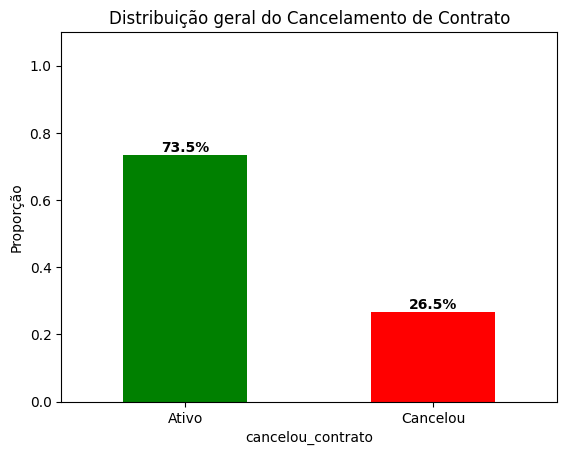

In [27]:
# Proporção de churn
ax = dados['cancelou_contrato'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title("Distribuição geral do Cancelamento de Contrato")
plt.xticks([0, 1], ['Ativo', 'Cancelou'], rotation=0)
plt.ylabel('Proporção')

# Adiciona porcentagem nas barras
for i, v in enumerate(dados['cancelou_contrato'].value_counts(normalize=True)):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')
plt.ylim(0, 1.1)
plt.show()


*Taxa geral de churn é significativa.*

📌 2. Perfil demográfico dos evadidos

🎯 Objetivo:
Saber quem são os clientes que mais evadem, por exemplo por gênero ou idade.

📊 Idade vs cancelamento

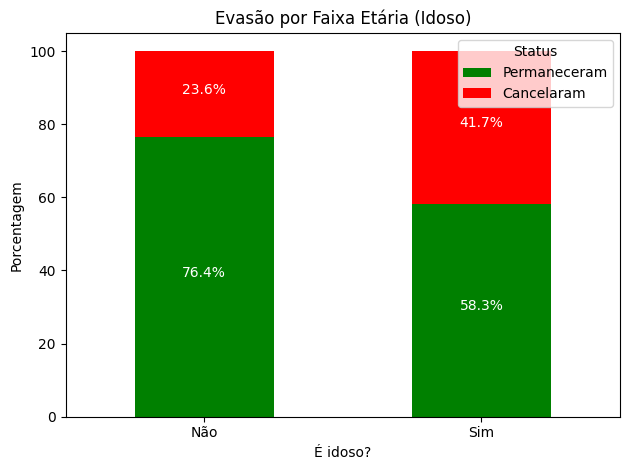

In [28]:
dados_idoso = dados.groupby('idoso')['cancelou_contrato'].value_counts(normalize=True).unstack() * 100

dados_idoso.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Evasão por Faixa Etária (Idoso)')
plt.ylabel('Porcentagem')
plt.xlabel('É idoso?')
plt.legend(['Permaneceram', 'Cancelaram'], title='Status')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)

for idx, row in enumerate(dados_idoso.values):
    plt.text(idx, row[0]/2, f'{row[0]:.1f}%', ha='center', color='white', fontsize=10)
    plt.text(idx, row[0] + row[1]/2, f'{row[1]:.1f}%', ha='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()


*Clientes idosos apresentam maior propensão ao cancelamento.*

📌 3. Análise de Contratos e Faturas

🎯 Objetivo:
Entender se churn está ligado a contrato curto ou valores altos de fatura.

⏳ Tipo de contrato vs cancelamento

💰 Mediana de fatura mensal

In [29]:
dados.groupby('cancelou_contrato')['fatura_mensal'].median()

,fatura_mensal
cancelou_contrato,
0,64.425
1,79.650


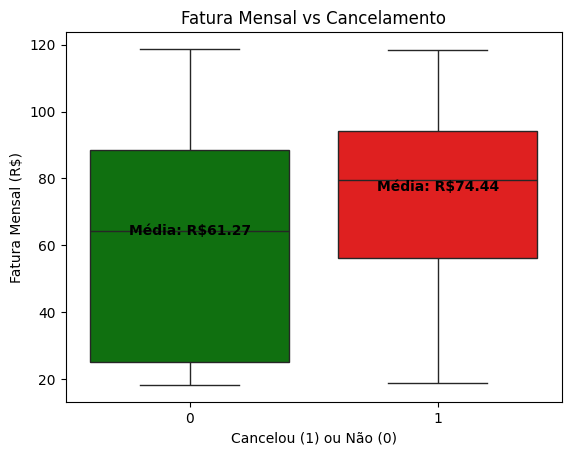

In [30]:
sns.boxplot(x='cancelou_contrato', y='fatura_mensal', data=dados,
            hue='cancelou_contrato', palette=['green', 'red'], legend=False)

plt.title("Fatura Mensal vs Cancelamento")
plt.xlabel("Cancelou (1) ou Não (0)")
plt.ylabel("Fatura Mensal (R$)")

# Adicionar as médias diretamente no gráfico
medias = dados.groupby('cancelou_contrato')['fatura_mensal'].mean()
for i, media in enumerate(medias):
    plt.text(i, media + 2, f"Média: R${media:.2f}", ha='center', fontweight='bold')

plt.show()






*Clientes com faturas muito altas podem cancelar.*

📌 4. Serviços contratados

🎯 Objetivo:
Ver se ter menos serviços (internet, suporte técnico etc.) está associado à evasão.

In [31]:
# Lista de colunas de serviços
col_servicos = [
    'tem_telefone', 'multiplas_linhas', 'seguranca_online', 'backup_online',
    'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming'
]

# Padroniza valores como string e converte para binário
for col in col_servicos:
    dados[col] = dados[col].astype(str).str.lower().str.strip()
    dados[col] = dados[col].replace({'yes': 1, 'no': 0, 'nan': 0})

# Converte para int
dados[col_servicos] = dados[col_servicos].fillna(0).astype(int)

# Soma os serviços contratados
dados['qtd_servicos'] = dados[col_servicos].sum(axis=1)









/tmp/ipython-input-2526518568.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[col] = dados[col].replace({'yes': 1, 'no': 0, 'nan': 0})


*Baixa adesão a serviços adicionais pode estar ligada ao cancelamento.*

📌 5. Tempo de permanência

Distribuição

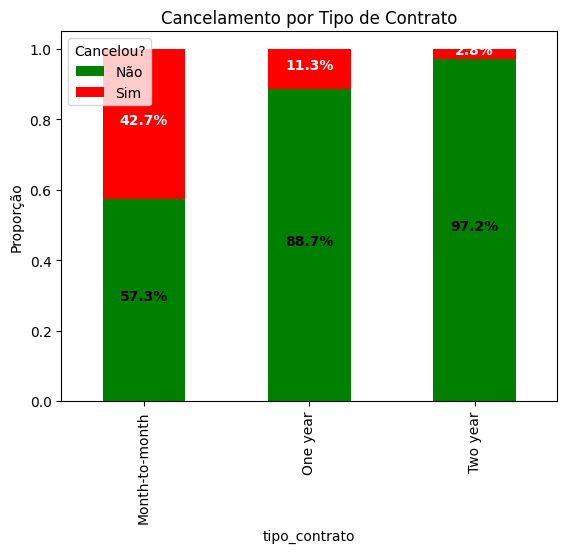

In [32]:
ct = pd.crosstab(dados['tipo_contrato'], dados['cancelou_contrato'], normalize='index')
ax = ct.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Cancelamento por Tipo de Contrato')
plt.ylabel('Proporção')
plt.legend(title='Cancelou?', labels=['Não', 'Sim'])

# Porcentagens
for i, (index, row) in enumerate(ct.iterrows()):
    y0 = row[0]
    y1 = row[1]
    plt.text(i, y0/2, f"{y0:.1%}", ha='center', color='black', fontweight='bold')
    plt.text(i, y0 + y1/2, f"{y1:.1%}", ha='center', color='white', fontweight='bold')
plt.ylim(0, 1.05)
plt.show()


*Clientes com menos de 9 meses tendem a cancelar mais.*

📌 6. Comportamento de pagamento

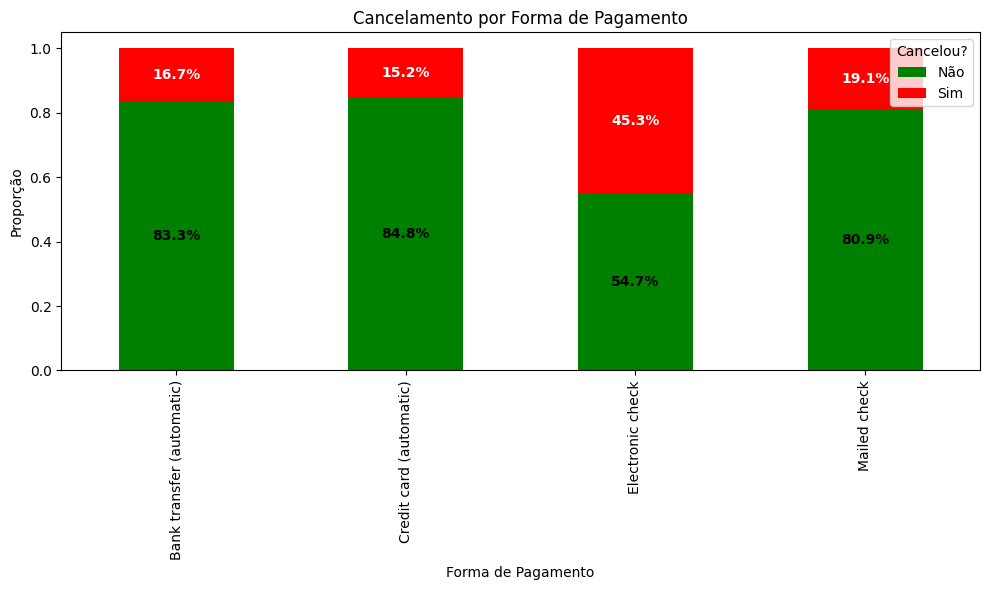

In [33]:
# Tabela cruzada com proporções por forma de pagamento
ct_fp = pd.crosstab(dados['forma_pagamento'], dados['cancelou_contrato'], normalize='index')

# Gráfico de barras empilhadas
ax = ct_fp.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Cancelamento por Forma de Pagamento')
plt.ylabel('Proporção')
plt.xlabel('Forma de Pagamento')
plt.legend(title='Cancelou?', labels=['Não', 'Sim'], loc='upper right')
plt.ylim(0, 1.05)

# Inserção das porcentagens dentro das barras
for i, (index, row) in enumerate(ct_fp.iterrows()):
    y0 = row[0]
    y1 = row[1]
    plt.text(i, y0 / 2, f"{y0:.1%}", ha='center', va='center', color='black', fontweight='bold')
    plt.text(i, y0 + y1 / 2, f"{y1:.1%}", ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


*Formas de pagamento menos automatizadas estão associadas a maior autonomia e maior churn.*

📌 7. Vínculos Familiares e Cancelamento

🎯 Objetivo: Avaliar se clientes com parceiro(a) ou dependentes cancelam menos.

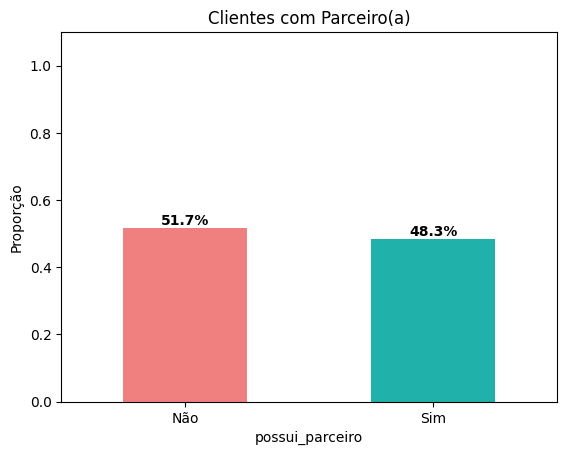

In [34]:
ax = dados['possui_parceiro'].value_counts(normalize=True).plot(kind='bar', color=['lightcoral', 'lightseagreen'])
plt.title("Clientes com Parceiro(a)")
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.ylabel("Proporção")

for i, v in enumerate(dados['possui_parceiro'].value_counts(normalize=True)):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')

plt.ylim(0, 1.1)
plt.show()



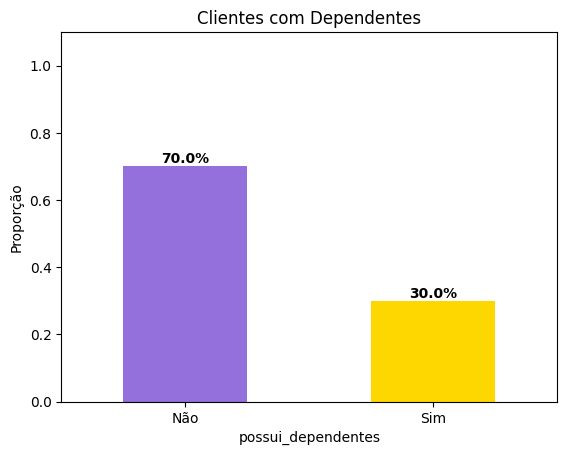

In [35]:
ax = dados['possui_dependentes'].value_counts(normalize=True).plot(kind='bar', color=['mediumpurple', 'gold'])
plt.title("Clientes com Dependentes")
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.ylabel("Proporção")
for i, v in enumerate(dados['possui_dependentes'].value_counts(normalize=True)):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center', fontweight='bold')
plt.ylim(0, 1.1)
plt.show()


*Clientes com vínculos familiares — como parceiro(a) ou dependentes — apresentaram menor taxa de cancelamento.*

📌 8. Correlação entre Variáveis Numéricas

🎯 Objetivo: Identificar quais fatores quantitativos têm maior relação com o cancelamento de contrato.


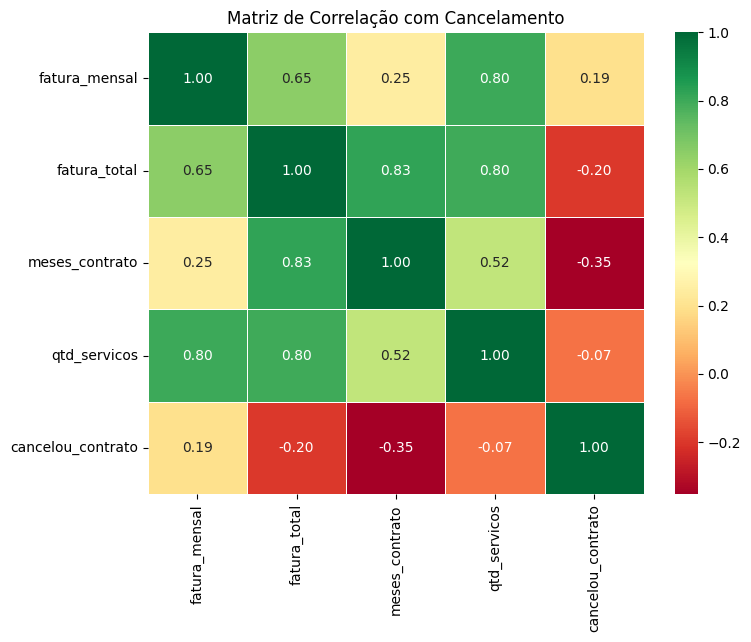

In [36]:
colunas_corr = ['fatura_mensal', 'fatura_total', 'meses_contrato', 'qtd_servicos', 'cancelou_contrato']
corr = dados[colunas_corr].corr()

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação com Cancelamento')
plt.show()

*Clientes com maior tempo de contrato e fatura acumulada tendem a cancelar menos.*


#📄Relatorio Final

Relatório de Análise de Evasão de Clientes - Telecom X

1. Introdução

A Telecom X enfrenta um problema significativo de evasão de clientes (churn), o que pode comprometer a sustentabilidade e o crescimento da empresa. O objetivo desta análise é identificar padrões de comportamento entre os clientes que cancelaram seus contratos e propor estratégias baseadas em dados para melhorar a retenção.

2. Limpeza e Tratamento de Dados

Os dados foram fornecidos no formato .json, organizados em seções como customer, phone, internet e account. As seguintes etapas foram aplicadas:

Normalização e concatenação dos dados em um único DataFrame.

Padronização de colunas: conversão para minúsculo e remoção de caracteres especiais.

Substituição de valores categóricos ("Yes"/"No") por valores binários (1/0).

Tratamento de valores ausentes (NaN): preenchimento com a média ou zero, conforme o contexto.

Conversão de colunas numéricas e criação de novas variáveis, como qtd_servicos e fatura_diaria.

3. Análise Exploratória de Dados (EDA)

Diversas análises foram realizadas para compreender o perfil dos clientes que evadiram.

Visão Geral do Churn

A taxa de churn é de aproximadamente 26,5%.

Perfil Demográfico

Idosos apresentaram a maior taxa de churn (41,7%), contrastando com apenas 23,6% entre não idosos.

Clientes com parceiro(a) ou dependentes apresentaram menor taxa de cancelamento.

Gênero não mostrou diferença significativa.

Contratos e Pagamentos

Clientes com contratos mensais ou pagamentos via electronic check apresentaram maior taxa de cancelamento (45,3%).

Formas automáticas de pagamento mostraram menor churn (~15%).

Faturas e Tempo de Contrato

Clientes com fatura mensal mais alta tendem a cancelar mais.

Quanto mais tempo de contrato, menor a chance de cancelamento.

Clientes com menos serviços contratados também apresentam maior churn.

Correlação de Variáveis

As variáveis que mais se correlacionam com o churn foram:

meses_contrato: -0.35

fatura_total: -0.20

fatura_mensal: +0.19 (positiva fraca)

4. Conclusões e Insights

Tempo de permanência é o fator mais forte contra o churn.

Idosos, clientes sem parceiro ou dependentes, e usuários com poucos serviços estão mais propensos a cancelar.

Formas manuais de pagamento estão fortemente ligadas ao cancelamento.

Esses dados podem ser usados para modelos preditivos de churn, auxiliando a empresa a agir preventivamente.

5. Recomendações

Incentivar contratos de longo prazo, oferecendo descontos por fidelidade.

Promover pacotes de serviços adicionais com vantagens para aumentar o engajamento.

Migrar clientes para formas de pagamento automático, como cartão ou transferência.

Oferecer suporte personalizado a idosos, com foco em retenção.

Criar campanhas para clientes com baixo uso de serviços, antes que cancelem.